What is Apriori algorithm?

Apriori Algorithm is a Machine Learning algorithm that is used to gain insight into the structured relationships between different items involved. It’s a data mining technique that is used for mining frequent itemsets and relevant association rules.

Example: Recommending products based on your purchased items. You can see this in different e-commerce websites. (Recommendation system)

Things that we need to know before implementation:

Association rule:
It identifies frequent patterns and associations(relations) among a set of items. Ex: If you go to buy a keyboard, you might also get a mouse. So place them aside in your market to get more profit.


Itemset: A set of items together is called an itemset. An itemset consists of two or more items. 

Frequent Itemset: Itemset that occurs frequently is called a frequent itemset. A set of items is called frequent if it satisfies a minimum threshold value for support and confidence.

Support: Tells us how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. Support shows transactions with items purchased together in a single transaction. Consider 5 transactions are under study and say Milk is purchased in 3 Transactions.

Support for Milk= 3/5

Confidence: Shows transactions where the items are purchased one after the other. How likely item Y is purchased when item X is purchased, expressed as {X -> Y}. Say Milk and Bread are analysed together. Bread is purchased after Milk 2 times.

Confidence (Milk->Bread) = Support for (Milk, Bread)/Support for Milk=2/Support for Milk

Drawback of Confidence is it only accounts for how popular milk is, but not bread which might misrepresent the importance of an association.

Lift: How likely item Y is purchased when item X is purchased, also controlling for how popular item Y is. Say bread was purchased 2 times out of 5 transactions-

Support for Bread=2/5

Lift (Milk->Bread) = Support for (Milk, Bread)/Support for Milk*Support for Bread

<img src="https://lh4.googleusercontent.com/ODPqvTXuc6ZnqnvjcIKaVqKQvvPAV9oqqqrNWvOgJl54Iw-qBSke0UdBOqRu9i0Awj6bEfM7Jedz4f9t8zORrJwrcyQv3OWlcCvI3ZAJjUVEt-gBbvrzJr1XjXAgMqcyu9vvU3y66rkizWjJzQ">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
foo = pd.read_csv('store_data.csv')
num_records = len(foo)
print(num_records)

7500


In [4]:
foo.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
foo.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:xlabel='shrimp', ylabel='count'>

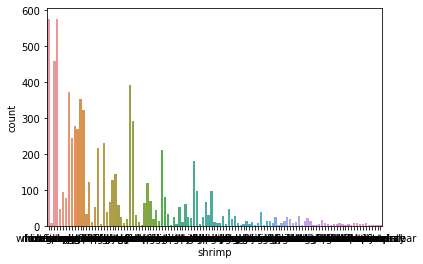

In [6]:
sns.countplot(foo['shrimp'])

In [7]:
records = []
#Not using the entire data. Too big for my laptop to compute
for i in range(0, num_records):
    records.append([str(foo.values[i,j]) for j in range(0,20)])

In [8]:
algo_rules = apriori(records, min_support=0.0053, min_confidence=0.20, min_lift=3, min_length=2)
algo_result = list(algo_rules)

In [9]:
print(len(algo_result))

32


In [10]:
print(algo_result[0])

RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])


In [11]:
results = []
for item in algo_result:
    pair  = item[0]
    items = [x for x in pair]
    
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    rows = (value0, value1, value2, value3, value4)
    
    results.append(rows)
    
    Label = ['Title1','Title2','Support', 'Confidence', 'Lift']
    
    store_suggestions = pd.DataFrame.from_records(results, columns=Label)
    
    print(store_suggestions)

                 Title1    Title2  Support Confidence     Lift
0  mushroom cream sauce  escalope  0.00573    0.30069  3.79032
                 Title1    Title2  Support Confidence     Lift
0  mushroom cream sauce  escalope  0.00573    0.30069  3.79032
1                 pasta  escalope  0.00586    0.37288  4.70018
                 Title1         Title2  Support Confidence     Lift
0  mushroom cream sauce       escalope  0.00573    0.30069  3.79032
1                 pasta       escalope  0.00586    0.37288  4.70018
2           ground beef  herb & pepper    0.016    0.32345  3.29155
                 Title1         Title2  Support Confidence     Lift
0  mushroom cream sauce       escalope  0.00573    0.30069  3.79032
1                 pasta       escalope  0.00586    0.37288  4.70018
2           ground beef  herb & pepper    0.016    0.32345  3.29155
3           ground beef   tomato sauce  0.00533    0.37735  3.84014
                 Title1             Title2  Support Confidence     Lift
0